In [65]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('flight_data01.csv')
df1=pd.read_csv('flight_data.csv')

In [3]:
data=pd.concat([df,df1])
data

,Unnamed: 0,Unnamed: 0.1,Airline_name,Departure,Arrival,Source,Destination,Lay_over,Price,Duration
0,0.0,0.0,Go First,09:10,10:45,Ahmedabad,New Delhi,Non stop,"₹ 5,060",01 h 35 m
1,1.0,1.0,Go First,13:25,15:00,Ahmedabad,New Delhi,Non stop,"₹ 5,060",01 h 35 m
2,2.0,2.0,Go First,17:30,19:05,Ahmedabad,New Delhi,Non stop,"₹ 5,060",01 h 35 m
3,3.0,3.0,Spicejet,06:10,11:10,Ahmedabad,New Delhi,1 stop via Jaipur,"₹ 5,060",05 h
4,4.0,4.0,Spicejet,06:10,11:10,Ahmedabad,New Delhi,1 stop via Jaipur,"₹ 5,060",NaN
...,...,...,...,...,...,...,...,...,...,...
529,NaN,NaN,Air India,16:20,17:55,Patna,New Delhi,Non stop,"₹ 5,202",01 h 35 m
530,NaN,NaN,IndiGo,16:30,18:15,Patna,New Delhi,Non stop,"₹ 5,202",01 h 45 m
531,NaN,NaN,Air India,19:10,20:55,Patna,New Delhi,Non stop,"₹ 5,202",01 h 45 m
532,NaN,NaN,IndiGo,19:40,21:25,Patna,New Delhi,Non stop,"₹ 5,202",01 h 45 m


In [4]:
data.to_csv('flight_data_final.csv',index='False')

#### Data Cleaning & EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 533
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    697 non-null    float64
 1   Unnamed: 0.1  697 non-null    float64
 2   Airline_name  1231 non-null   object 
 3   Departure     1231 non-null   object 
 4   Arrival       1231 non-null   object 
 5   Source        1231 non-null   object 
 6   Destination   1231 non-null   object 
 7   Lay_over      1231 non-null   object 
 8   Price         1231 non-null   object 
 9   Duration      966 non-null    object 
dtypes: float64(2), object(8)
memory usage: 105.8+ KB


In [7]:
data.isnull().sum()

Unnamed: 0      534
Unnamed: 0.1    534
Airline_name      0
Departure         0
Arrival           0
Source            0
Destination       0
Lay_over          0
Price             0
Duration        265
dtype: int64

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

<AxesSubplot:>

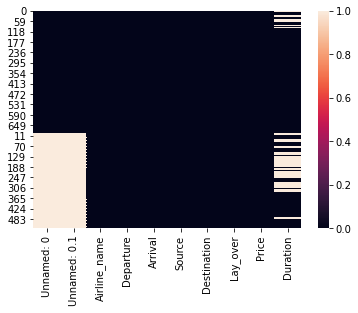

In [11]:
sns.heatmap(data.isnull())

In [12]:
#there are 3 columns with nan values 
##in the dataset there are a total of 10 columns with the "Price" being the the determining factor 

In [17]:
data.dtypes

Unnamed: 0      float64
Unnamed: 0.1    float64
Airline_name     object
Departure        object
Arrival          object
Source           object
Destination      object
Lay_over         object
Price            object
Duration         object
dtype: object

In [14]:
data['Airline_name'].value_counts()

IndiGo                                         494
Go First                                       201
AirAsia                                        122
Vistara                                        109
Air India                                      101
Spicejet                                        80
Emirates                                        13
Air India, IndiGo                                9
Vistara, Srilankan Airlines                      7
AirAsia, IndiGo                                  7
United Airlines                                  7
Vistara, IndiGo                                  7
Qatar Airways                                    6
Vistara, United Airlines                         5
Go First, IndiGo                                 5
Spicejet, Go First                               4
Spicejet, IndiGo                                 4
American Airlines                                4
IndiGo, Spicejet                                 3
AirAsia, Vistara               

In [15]:
data['Source'].value_counts()

New Delhi     734
Mumbai         79
Kolkata        71
Hyderabad      66
Pune           58
Bengaluru      47
Ahmedabad      47
Chennai        47
Patna          36
Guwahati       16
Vijayawada     12
Coimbatore     10
Indore          8
Name: Source, dtype: int64

In [16]:
data['Destination'].value_counts()

New Delhi                 147
Bengaluru                 132
Mumbai                    110
Goa                       100
Hyderabad                  93
Chandigarh                 87
Chennai                    83
Kolkata                    63
Ahmedabad                  50
Mangalore                  33
Colombo                    31
Visakhapatnam              30
New York                   26
Bagdogra                   26
Jaipur                     25
Vijayawada                 21
Indore                     19
Udaipur                    19
Paris                      19
Newark                     18
Nagpur                     18
Male                       17
Jodhpur                    17
Tiruchirappalli            16
Guwahati                   15
Agartala                   14
New York-LaGuardia Apt      1
Westchester County          1
Name: Destination, dtype: int64

In [18]:
###the column contains unwated information , will clean the data , and cahnge the dtype from object to float.
data['Price']

0      ₹ 5,060
1      ₹ 5,060
2      ₹ 5,060
3      ₹ 5,060
4      ₹ 5,060
        ...   
529    ₹ 5,202
530    ₹ 5,202
531    ₹ 5,202
532    ₹ 5,202
533    ₹ 5,202
Name: Price, Length: 1231, dtype: object

In [19]:
data['Price']=data['Price'].str.replace('₹','')#### replacing '₹' as its a string component 
data['Price']

0       5,060
1       5,060
2       5,060
3       5,060
4       5,060
        ...  
529     5,202
530     5,202
531     5,202
532     5,202
533     5,202
Name: Price, Length: 1231, dtype: object

In [20]:
data['Price']=data['Price'].str.replace(',','')#### replacing ',' as its a string component
data['Price']

0       5060
1       5060
2       5060
3       5060
4       5060
       ...  
529     5202
530     5202
531     5202
532     5202
533     5202
Name: Price, Length: 1231, dtype: object

In [21]:
data['Price']=data['Price'].astype('float')#changing the data type to float
data['Price'].dtypes

dtype('float64')

C:\Users\MyPc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndiGo                                         494
Go First                                       201
AirAsia                                        122
Vistara                                        109
Air India                                      101
Spicejet                                        80
Emirates                                        13
Air India, IndiGo                                9
Vistara, Srilankan Airlines                      7
AirAsia, IndiGo                                  7
United Airlines                                  7
Vistara, IndiGo                                  7
Qatar Airways                                    6
Vistara, United Airlines                         5
Go First, IndiGo                                 5
Spicejet, Go First                               4
Spicejet, IndiGo                                 4
American Airlines                                4
IndiGo, Spicejet                                 3
AirAsia, Vistara               

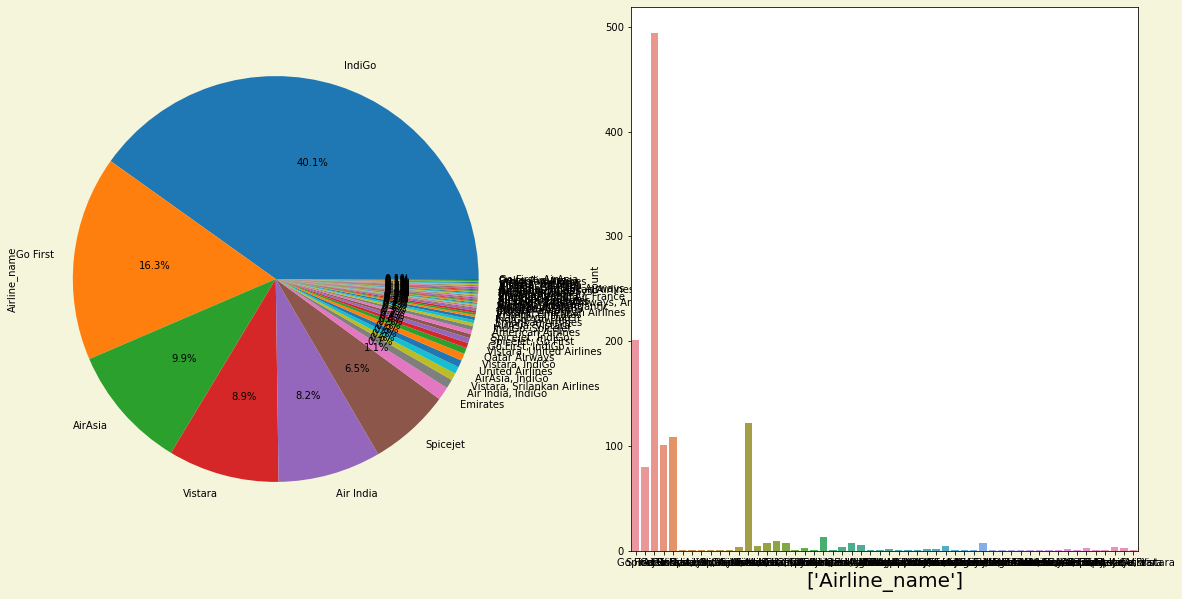

In [22]:
plt.figure(figsize=(20,10),facecolor='beige')
plt.subplot(1,2,1)
data['Airline_name'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Airline_name'])
plt.xlabel(['Airline_name'],fontsize=20)
data['Airline_name'].value_counts()

C:\Users\MyPc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


New Delhi     734
Mumbai         79
Kolkata        71
Hyderabad      66
Pune           58
Bengaluru      47
Ahmedabad      47
Chennai        47
Patna          36
Guwahati       16
Vijayawada     12
Coimbatore     10
Indore          8
Name: Source, dtype: int64

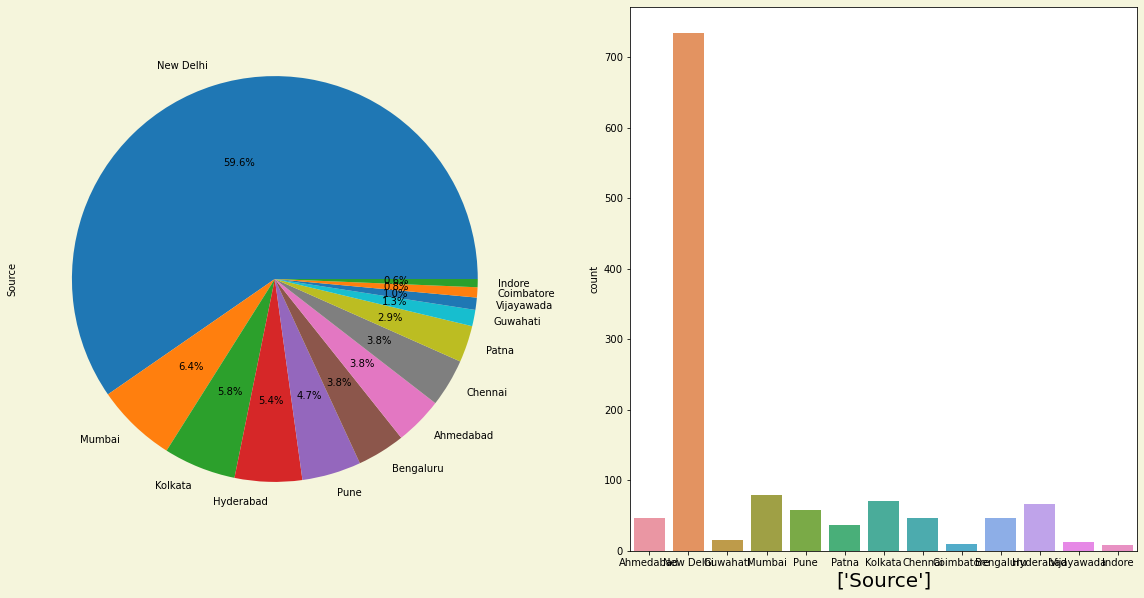

In [23]:
plt.figure(figsize=(20,10),facecolor='beige')
plt.subplot(1,2,1)
data['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Source'])
plt.xlabel(['Source'],fontsize=20)
data['Source'].value_counts()

C:\Users\MyPc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


New Delhi                 147
Bengaluru                 132
Mumbai                    110
Goa                       100
Hyderabad                  93
Chandigarh                 87
Chennai                    83
Kolkata                    63
Ahmedabad                  50
Mangalore                  33
Colombo                    31
Visakhapatnam              30
New York                   26
Bagdogra                   26
Jaipur                     25
Vijayawada                 21
Indore                     19
Udaipur                    19
Paris                      19
Newark                     18
Nagpur                     18
Male                       17
Jodhpur                    17
Tiruchirappalli            16
Guwahati                   15
Agartala                   14
New York-LaGuardia Apt      1
Westchester County          1
Name: Destination, dtype: int64

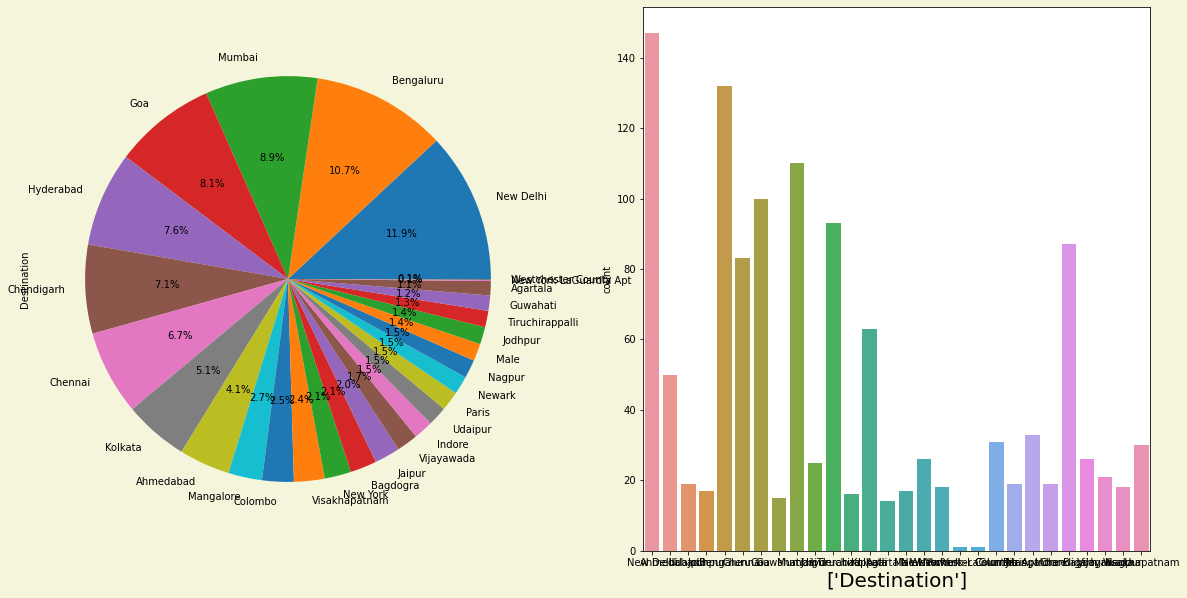

In [24]:
plt.figure(figsize=(20,10),facecolor='beige')
plt.subplot(1,2,1)
data['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Destination'])
plt.xlabel(['Destination'],fontsize=20)
data['Destination'].value_counts()

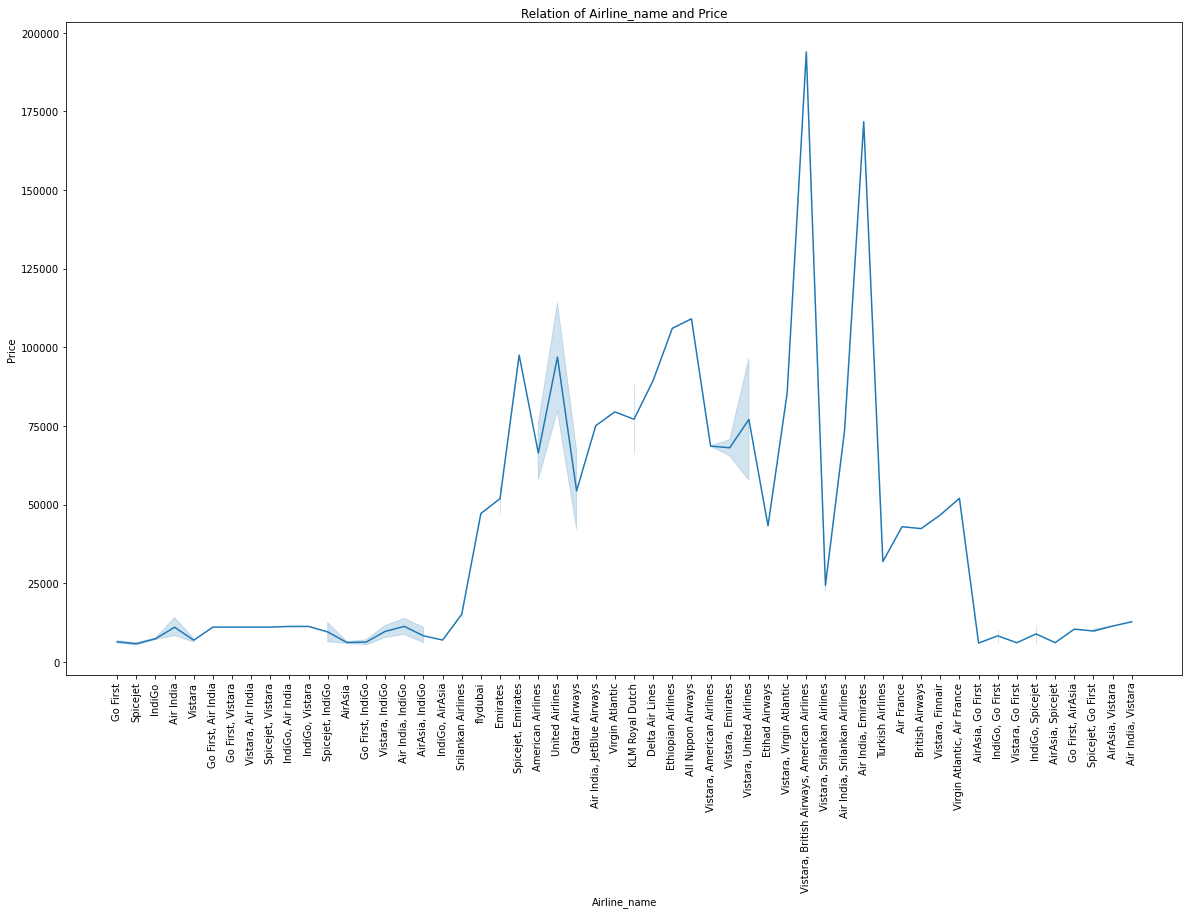

In [29]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Airline_name',y='Price',data=data).set_title('Relation of Airline_name and Price')
plt.xticks(rotation=90)
plt.show()

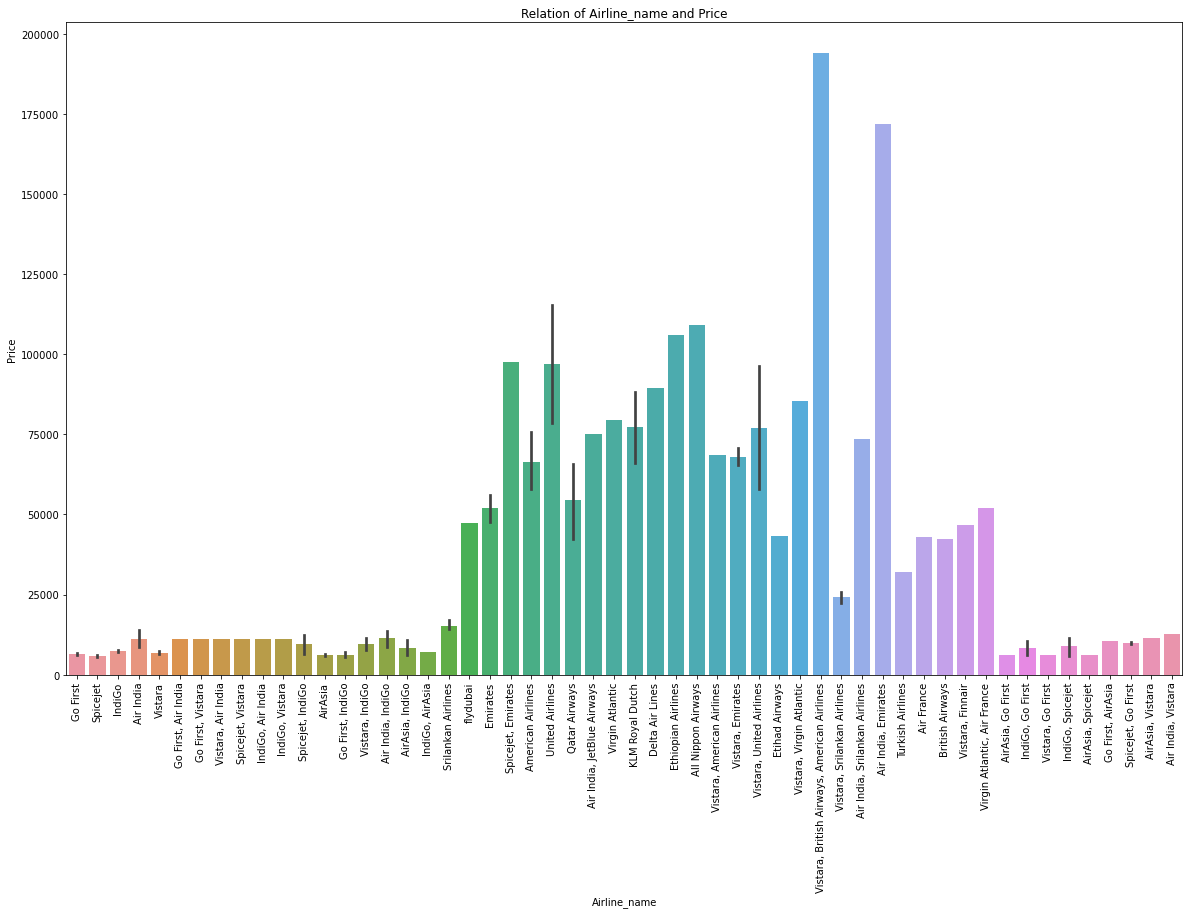

In [28]:
plt.figure(figsize=(20,12))
sns.barplot(x='Airline_name',y='Price',data=data).set_title('Relation of Airline_name and Price')
plt.xticks(rotation=90)
plt.show()

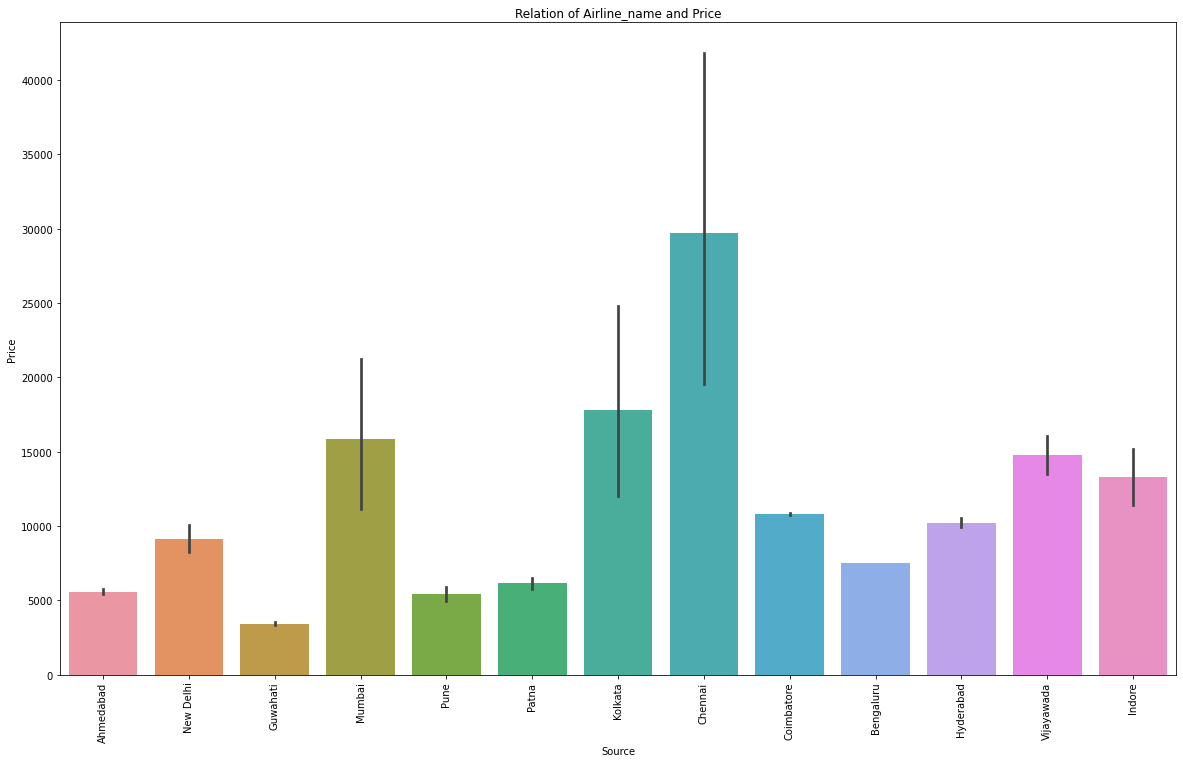

In [30]:
plt.figure(figsize=(20,12))
sns.barplot(x='Source',y='Price',data=data).set_title('Relation of Airline_name and Price')
plt.xticks(rotation=90)
plt.show()

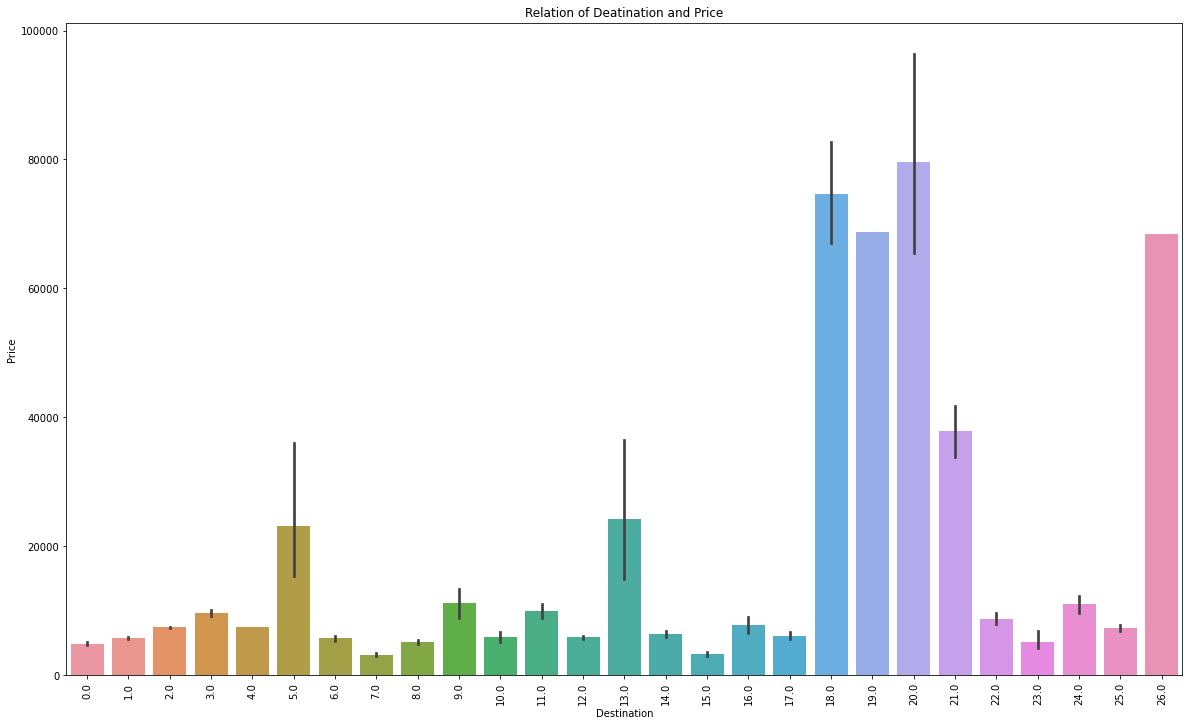

In [77]:
plt.figure(figsize=(20,12))
sns.barplot(x='Destination',y='Price',data=data).set_title('Relation of Airline_name and Price')
plt.xticks(rotation=90)
plt.show()

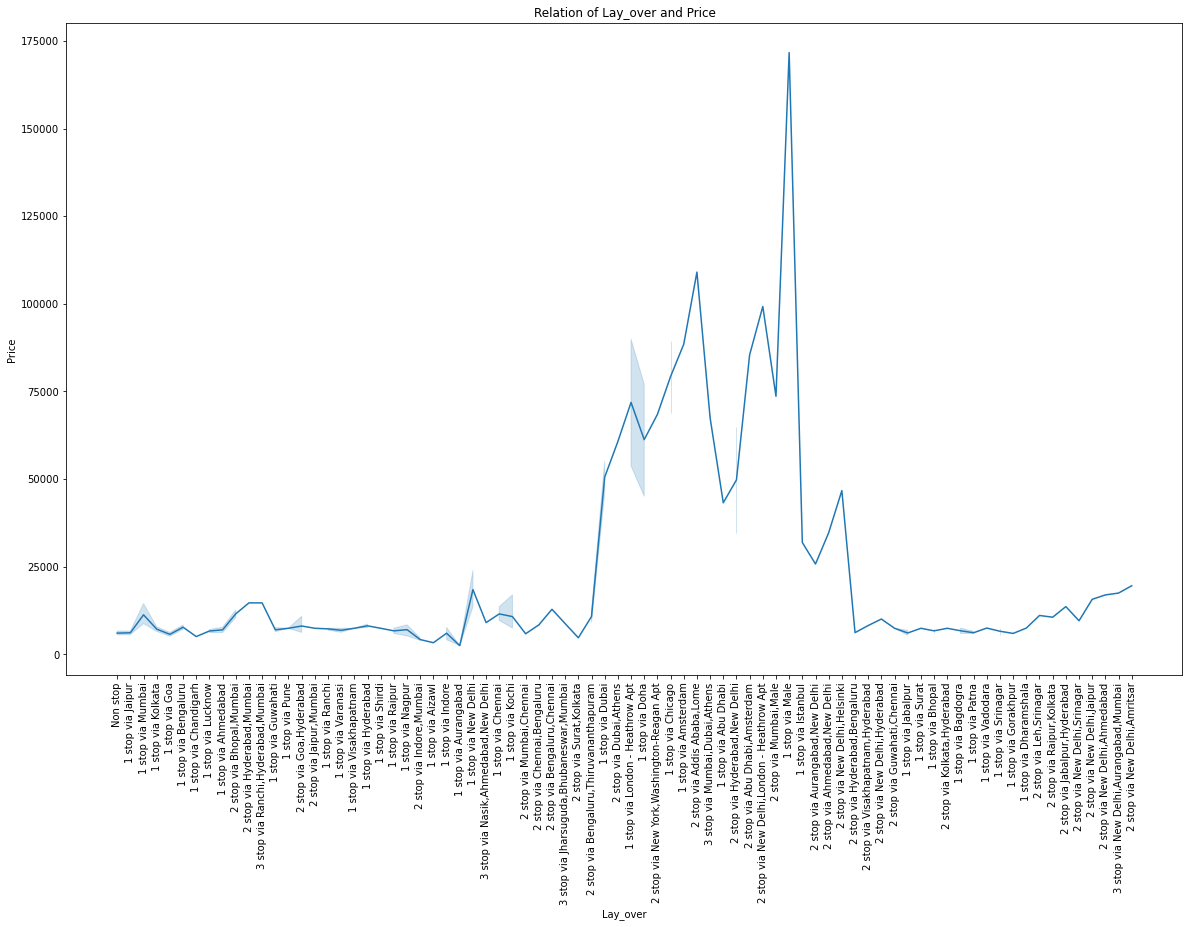

In [38]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Lay_over',y='Price',data=data).set_title('Relation of Lay_over and Price')
plt.xticks(rotation=90)
plt.show()

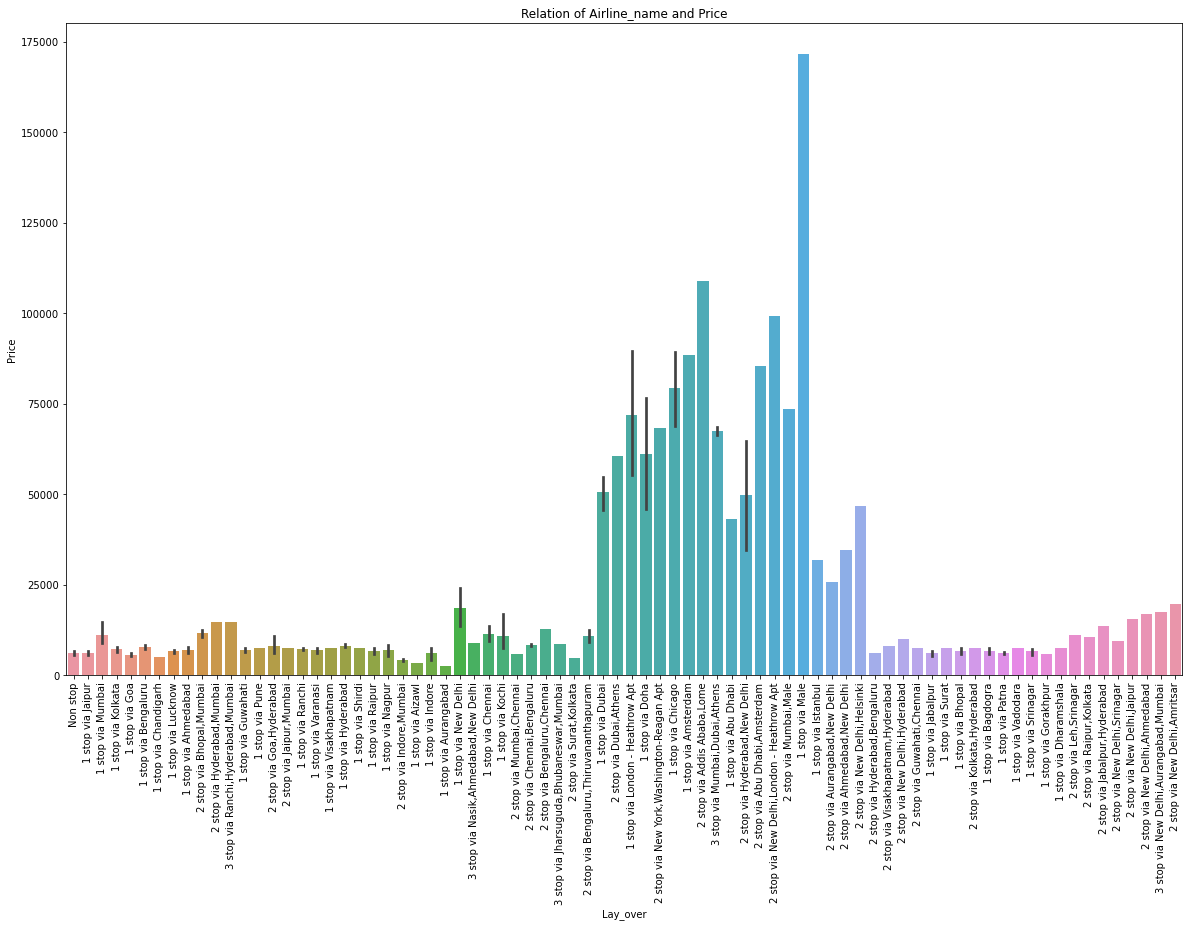

In [39]:
plt.figure(figsize=(20,12))
sns.barplot(x='Lay_over',y='Price',data=data).set_title('Relation of Airline_name and Price')
plt.xticks(rotation=90)
plt.show()

The above visualizations show the following informations -
- All prices are directly related to the Airlines.
- The prices are related to the destination.
- The prices are related to the source .
- the price related to the amounts of stops or layovers.
-- The following Airlines show the maximum price:
    - Vistara, British Airways, American Airlines( shows maximum price ,i.e., the air fares are maximum)
    - Emerates, AirIndia(shows second most maximum price)
-- The following destination has the most price :
    - New Delhi 
-- The following layover is the having the maximum price
    - Male 
    - 2 stops via Addis, Ababa, Lome

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)


In [35]:
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [36]:
data.columns

Index(['Airline_name', 'Departure', 'Arrival', 'Source', 'Destination',
       'Lay_over', 'Price', 'Duration'],
      dtype='object')

In [37]:
####the columns having nan values have been dropped.

In [42]:
feature=data[['Price']]

C:\Users\MyPc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


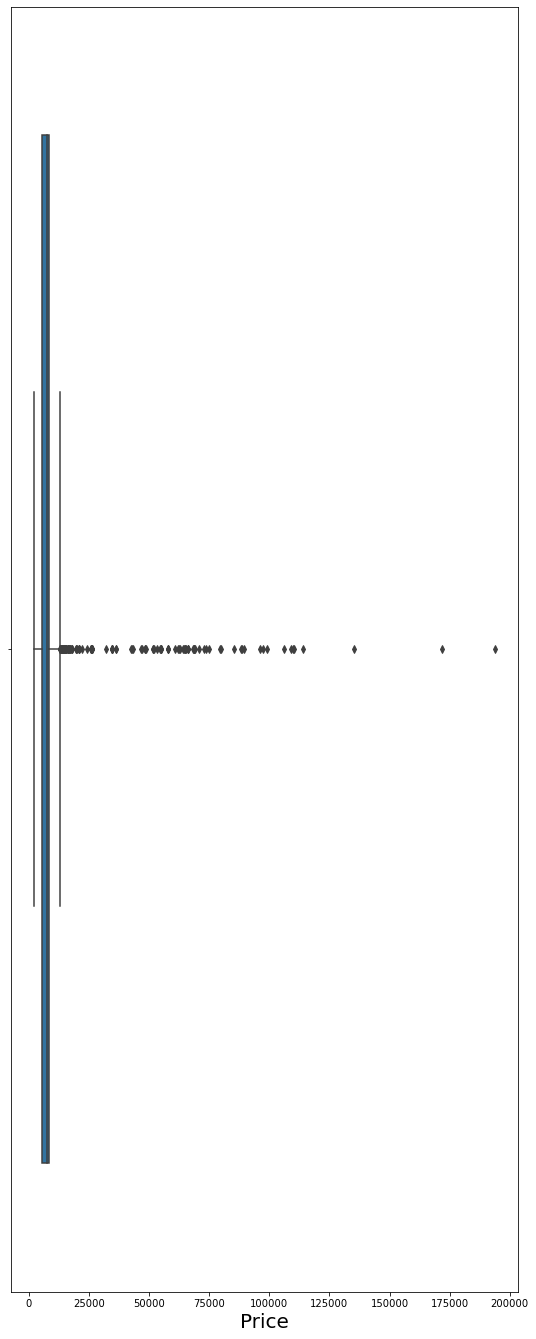

In [44]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in feature:
    if plotnumber<=2:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(feature[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [45]:
data.describe()

,Price
count,1231.000000
mean,10462.000000
std,15980.831391
min,2019.000000
25%,5264.500000
50%,7352.000000
75%,8257.000000
max,193850.000000


###There is the presence of skewness and outliers present by as this is the target column the correcting for skewness will be not be done.

In [52]:
data['Duration']=data['Duration'].str.replace('NaN','0')
data['Duration']

0      01 h 35 m
1      01 h 35 m
2      01 h 35 m
3           05 h
4            NaN
         ...    
529    01 h 35 m
530    01 h 45 m
531    01 h 45 m
532    01 h 45 m
533    01 h 50 m
Name: Duration, Length: 1231, dtype: object

In [53]:
data.isnull().sum()

Airline_name      0
Departure         0
Arrival           0
Source            0
Destination       0
Lay_over          0
Price             0
Duration        265
dtype: int64

<AxesSubplot:>

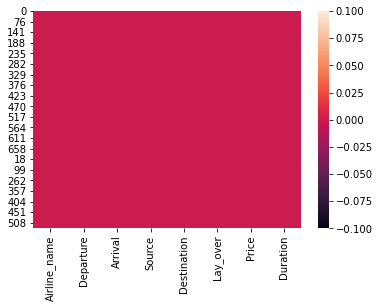

In [56]:
data.dropna( inplace=True)###dropping NaN values from the dataset.
sns.heatmap(data.isnull())

In [57]:
from sklearn.preprocessing import OrdinalEncoder          #The encoder helps to convert categorical columns having an object dtype  to float values

enc=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))
data.head(30)

,Airline_name,Departure,Arrival,Source,Destination,Lay_over,Price,Duration
0,19.0,74.0,73.0,0.0,17.0,64.0,5060.0,12.0
1,19.0,123.0,120.0,0.0,17.0,64.0,5060.0,12.0
2,19.0,168.0,168.0,0.0,17.0,64.0,5060.0,12.0
3,31.0,40.0,77.0,0.0,17.0,18.0,5060.0,77.0
11,23.0,78.0,77.0,0.0,17.0,64.0,5061.0,14.0
12,23.0,97.0,98.0,0.0,17.0,64.0,5061.0,18.0
13,23.0,169.0,170.0,0.0,17.0,64.0,5061.0,14.0
14,23.0,92.0,160.0,0.0,17.0,6.0,5061.0,150.0
15,1.0,113.0,117.0,0.0,17.0,64.0,5062.0,26.0
16,1.0,222.0,223.0,0.0,17.0,64.0,5062.0,12.0


###### Splitting the data into x and y.

In [59]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [60]:
##Normalization of the 'x' data.
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(966, 7)

In [61]:
#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
##Hold-out Method
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

R Square Score of ln: 0.3555739012926119


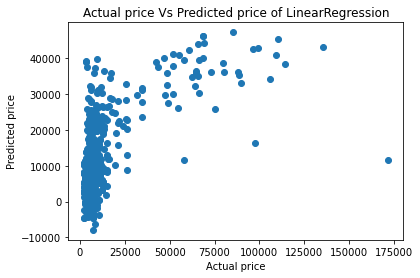

In [63]:
#Model Training:
ln = LinearRegression()
ln.fit(x_train,y_train)
#Model Prediction with trained data:
y_ln_pred = ln.predict(x_train)
print("R Square Score of ln:",r2_score(y_train,y_ln_pred))
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_ln_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of LinearRegression')
plt.show()

In [66]:
# Predicting test data with model:
y_test_ln_pred =ln.predict(x_test)
ln_accuracy = r2_score(y_test,y_test_ln_pred)
print("R Square Score of Linear Regressor:",ln_accuracy)
print('Accuracy of ln :',ln_accuracy*100)
print ('mean absolute error of Linear Regressor is: ',mean_absolute_error(y_test,y_test_ln_pred))
print ('mean squared error of Linear Regressor is: ',mean_squared_error(y_test,y_test_ln_pred))
print ('Root mean squared error of Linear Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_ln_pred)))

R Square Score of Linear Regressor: 0.3457289325810532
Accuracy of ln : 34.57289325810532
mean absolute error of Linear Regressor is:  7903.87797485783
mean squared error of Linear Regressor is:  215219928.83962294
Root mean squared error of Linear Regressor is:  14670.375892921862


R Square Score of Random Forest Regressor: 0.9638993473811941


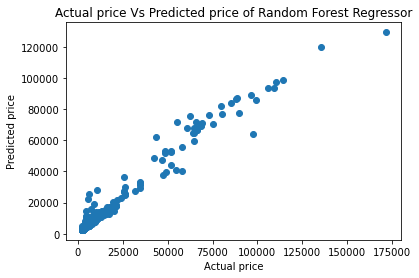

In [67]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)
print("R Square Score of Random Forest Regressor:",r2_score(y_train,y_rf_pred))
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()

In [68]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)
rf_accuracy = r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

R Square Score of Random Forest Regressor: 0.7105971546516467
Accuracy of RFR : 71.05971546516467
mean absolute error of Random Forest Regressor:  3214.924008264463
mean squared error of Random Forest Regressor is:  95197942.99871448
Root mean squared error of Random Forest Regressor is:  9756.943322512152


In [69]:
##Regularization using Lasso:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)
#best alpha parameter
alpha = lasscv.alpha_
alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.3457163042509993

In [70]:
##Regularization Using Ridge:
from array import array
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridge_alpha= ridgecv.alpha_
ridge_alpha
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.34573905445279685

In [74]:
###Cross-validation of the two models
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
ln_cv_score = cross_val_score(ln,x_train,y_train,cv=5,scoring='r2')
print(ln_cv_score)

[0.74417413 0.72261514 0.82503703 0.44851915 0.79244435]
[0.37999067 0.36334887 0.32374132 0.1982562  0.40184431]


###### Rf(Random Forest Regressor) has the highest scores hence it will be the better among the two models that can be used for testing the prediction.

In [72]:
x_predict = list(rf.predict(x_test))
df = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(df))


     predicted_values  orignal_values
655          52200.01         42966.0
326           4670.93          5100.0
628          18036.68         20885.0
467           6577.85          6174.0
296           2839.51          2763.0
..                ...             ...
667           8849.58          4898.0
155           7576.33          7425.0
75            8661.28         11058.0
317           6014.35          5955.0
502          48486.18          4713.0

[242 rows x 2 columns]


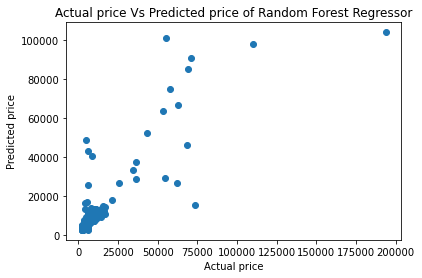

In [73]:
plt.scatter(y_test,x_predict)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()

In [76]:
import pickle
filename = 'flight_price_predict.pkl'
pickle.dump(rf, open(filename, 'wb'))